# Predicting sales of toyota corola 
### predicting based on regression and validating our model using step regression
The goal of this project is to fit a model to understand the sales of Toyota model. Model,Price, Age_08_04, Mfg_Month, Mfg_Year, KM, Fuel_Type, HP, Met_Color, Color, Automatic, CC, Doors, Cylinders, Gears etc are a few of the 39 variables that the data has. It is pre cleaned and hence, the rest of the project we will only be coming up with algorithm and the model that fits it the best.

In [79]:
# Install Packages

install.packages('corrgram')
install.packages('forecast')
install.packages('leaps')
install.packages('ggplot2')

In [80]:
# Calling Packages

library('corrgram')
library('forecast')
library('leaps')
library('ggplot2')

In [ ]:
# Read and find correlation

car.df <- read.csv("c:/Users/Sandhya Ravindran/Desktop/r_wd/ToyotaCorolla.csv")
correl <- cor(car.df[sapply(car.df, is.numeric)])

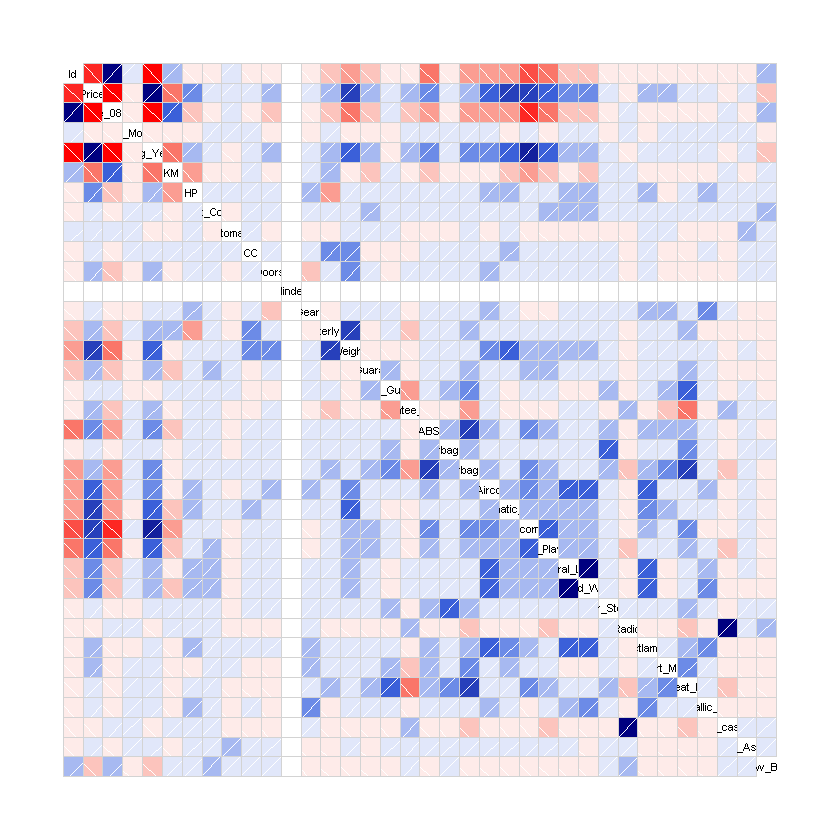

In [42]:
corrgram(correl)

### The above plot was a pain to the eyes. For aesthetics sake, let us plot only the variables with the highest corellation. I have manually combined them in a variable called selected.var to help plot.  

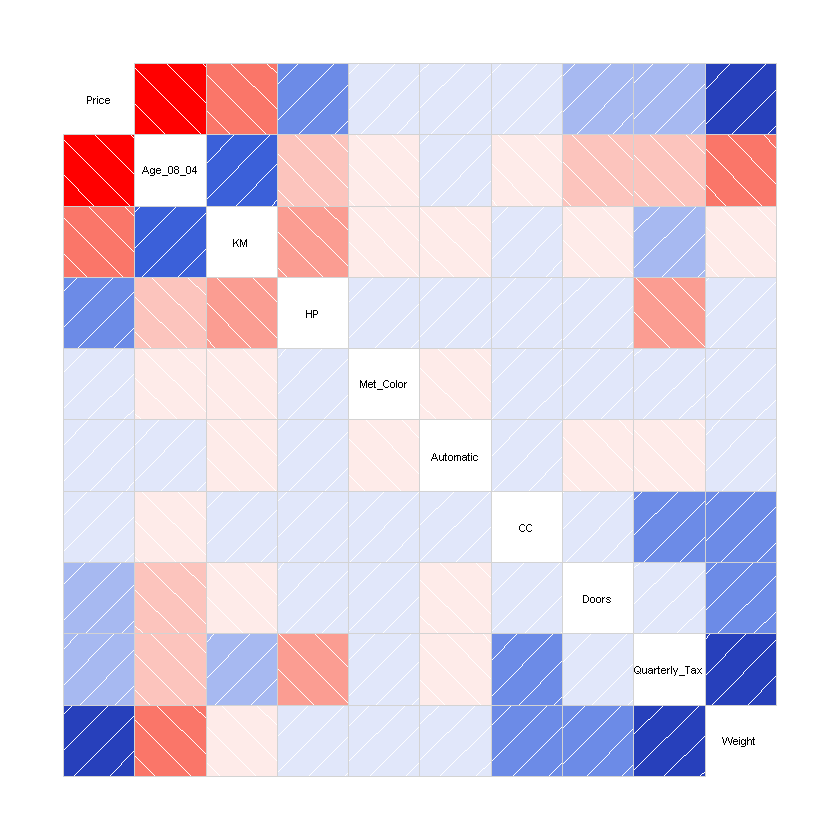

In [87]:
selected.var <- c(3, 4, 7, 8, 9, 10, 12, 13, 14, 17, 18)
car.df.h <- car.df[,c(3, 4, 7, 8, 9, 10, 12, 13, 14, 17, 18)]
correl2 <- cor(car.df.h[sapply(car.df.h, is.numeric)])
corrgram(correl2)

The regressor match our intuition. (I have attempted different combinations of regressors to choose selected.var. I choose them based on the model that fit the data best.) Let us perform linear regression for verification. 

### Partition data 

In [44]:
# set seed for reproducing the partition

set.seed(1)

# partition data

train.index <- sample(c(1:1000), 600)  
train.df <- car.df[train.index, selected.var]
valid.df <- car.df[-train.index, selected.var]


In [45]:
car.lm <- lm(Price ~., data = train.df)
options(scipen = 999)
summary(car.lm)


Call:
lm(formula = Price ~ ., data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8212.5  -839.2   -14.3   831.5  7270.7 

Coefficients:
                    Estimate   Std. Error t value             Pr(>|t|)    
(Intercept)     -1774.877829  1643.744823  -1.080               0.2807    
Age_08_04        -135.430875     4.875906 -27.776 < 0.0000000000000002 ***
KM                 -0.019003     0.002341  -8.116  0.00000000000000283 ***
Fuel_TypeDiesel  1208.339159   534.431400   2.261               0.0241 *  
Fuel_TypePetrol  2425.876714   520.587979   4.660  0.00000391697679667 ***
HP                 38.985537     5.587183   6.978  0.00000000000811621 ***
Met_Color          84.792715   126.883452   0.668               0.5042    
Automatic         306.684154   289.433138   1.060               0.2898    
CC                  0.031966     0.099075   0.323               0.7471    
Doors             -44.157742    64.056530  -0.689               0.4909    
Quarterly_Tax     

 Our adjusted r squared is about 0.854. Let us store residuals and plot them.

[1] 1

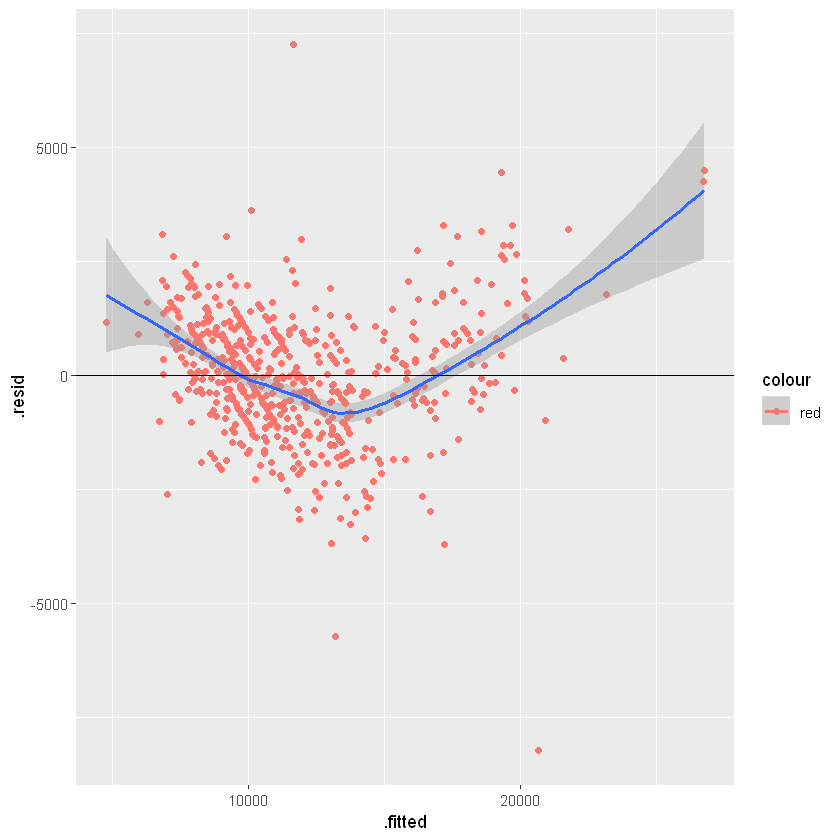

In [86]:
car.lm.pred <- predict(car.lm, valid.df)
all.residuals <- valid.df$Price - car.lm.pred
length(all.residuals[which(all.residuals > -1406 & all.residuals < 1406)])/400
df <- augment(car.lm)

#all.residuals
ggplot(df, aes(x = .fitted, y = .resid, color = 'red')) + geom_point()+geom_smooth(aes(colour = fitted(car.lm), fill = fitted(car.lm)))+geom_hline(yintercept=0)

In [46]:
car.lm.pred <- predict(car.lm, valid.df)
options(scipen=999, digits = 0)
some.residuals <- valid.df$Price[1:20] - car.lm.pred[1:20]
data.frame("Predicted" = car.lm.pred[1:20], "Actual" = valid.df$Price[1:20],
           "Residual" = some.residuals)

,Predicted,Actual,Residual
3,17175,13950,-3225
6,15704,12950,-2754
8,16727,18600,1873
9,20709,21500,791
10,14668,12950,-1718
11,20756,20950,194
13,20743,19600,-1143
16,20592,22000,1408
17,20116,22750,2634
18,16695,17950,1255


In [47]:
accuracy(car.lm.pred, valid.df$Price)

,ME,RMSE,MAE,MPE,MAPE
Test set,304,1334,1027,3,11


## Validating our choice of variables using step regression.
 In this section, we will perform forward, backward and both directional step regresssions to choose our best regression subset 

In [52]:
# run exhaustive serach

search <- regsubsets(Price ~ ., data = train.df, nbest = 1, nvmax = dim(train.df)[2],
                     method = "exhaustive")
sum <- summary(search)

In [53]:
# show models

sum$which

# show metrics

sum$rsq
sum$adjr2
sum$Cp

(Intercept),Age_08_04,KM,Fuel_TypeDiesel,Fuel_TypePetrol,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE
TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE


[1] 1 1 1 1 1 1 1 1 1 1 1

[1] 1 1 1 1 1 1 1 1 1 1 1

NULL

In [82]:
#backward step()

car.lm.step <- step(car.lm, direction = "backward")
summary(car.lm.step)
car.lm.step.pred <- predict(car.lm.step, valid.df)
accuracy(car.lm.step.pred, valid.df$Price)

Start:  AIC=8710
Price ~ Age_08_04 + KM + Fuel_Type + HP + Met_Color + Automatic + 
    CC + Doors + Quarterly_Tax + Weight

                Df  Sum of Sq        RSS  AIC
- CC             1     205921 1163353408 8709
- Met_Color      1     883415 1164030901 8709
- Doors          1     940036 1164087522 8709
- Automatic      1    2220975 1165368462 8710
<none>                        1163147487 8710
- Fuel_Type      2   45912159 1209059646 8730
- Quarterly_Tax  1   81221965 1244369451 8749
- HP             1   96311621 1259459107 8756
- KM             1  130298929 1293446416 8772
- Weight         1  134438616 1297586103 8774
- Age_08_04      1 1526097385 2689244872 9211

Step:  AIC=8709
Price ~ Age_08_04 + KM + Fuel_Type + HP + Met_Color + Automatic + 
    Doors + Quarterly_Tax + Weight

                Df  Sum of Sq        RSS  AIC
- Met_Color      1     903466 1164256874 8707
- Doors          1     912544 1164265951 8707
- Automatic      1    2574040 1165927447 8708
<none>             


Call:
lm(formula = Price ~ Age_08_04 + KM + Fuel_Type + HP + Quarterly_Tax + 
    Weight, data = train.df)

Residuals:
   Min     1Q Median     3Q    Max 
 -8263   -825      1    839   7312 

Coefficients:
                   Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)     -1853.36897  1620.35672   -1.14                0.253    
Age_08_04        -135.72630     4.83995  -28.04 < 0.0000000000000002 ***
KM                 -0.01912     0.00233   -8.19   0.0000000000000016 ***
Fuel_TypeDiesel  1179.35368   526.25097    2.24                0.025 *  
Fuel_TypePetrol  2374.05722   517.80593    4.58   0.0000055461532557 ***
HP                 39.27366     5.51783    7.12   0.0000000000031903 ***
Quarterly_Tax      16.43837     2.58633    6.36   0.0000000004140248 ***
Weight             12.74441     1.47320    8.65 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0 '**' 0 '*' 0 '.' 0 ' ' 1

Residual standard error: 1400 on 592 degrees of freedom
Multiple R-squared:  0.8

,ME,RMSE,MAE,MPE,MAPE
Test set,317,1341,1036,3,11


In [83]:
# null model
car.lm.null <- lm(Price~1, data = train.df)

# run forward regression

car.lm.step <- step(car.lm.null, scope=list(lower=car.lm.null, upper=car.lm), direction = "forward")
summary(car.lm.step)
car.lm.step.pred <- predict(car.lm.step, valid.df)
accuracy(car.lm.step.pred, valid.df$Price)

Start:  AIC=9854
Price ~ 1

                Df  Sum of Sq        RSS  AIC
+ Age_08_04      1 6137509061 1980418070 9010
+ Weight         1 2788898896 5329028235 9604
+ KM             1 2740141990 5377785141 9609
+ HP             1  749880179 7368046953 9798
+ Quarterly_Tax  1  424809279 7693117852 9824
+ Doors          1  276077528 7841849603 9835
+ Met_Color      1  250158547 7867768584 9837
+ Automatic      1  150410319 7967516813 9845
+ CC             1  144738816 7973188315 9845
+ Fuel_Type      2   78814417 8039112714 9852
<none>                        8117927131 9854

Step:  AIC=9010
Price ~ Age_08_04

                Df Sum of Sq        RSS  AIC
+ Weight         1 299433454 1680984616 8913
+ HP             1 277447526 1702970544 8921
+ KM             1 133346095 1847071975 8970
+ Quarterly_Tax  1  34220667 1946197403 9001
+ Doors          1  21206552 1959211518 9005
+ Automatic      1  19506297 1960911773 9006
+ CC             1  19345187 1961072883 9006
<none>                  


Call:
lm(formula = Price ~ Age_08_04 + Weight + HP + KM + Quarterly_Tax + 
    Fuel_Type, data = train.df)

Residuals:
   Min     1Q Median     3Q    Max 
 -8263   -825      1    839   7312 

Coefficients:
                   Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)     -1853.36897  1620.35672   -1.14                0.253    
Age_08_04        -135.72630     4.83995  -28.04 < 0.0000000000000002 ***
Weight             12.74441     1.47320    8.65 < 0.0000000000000002 ***
HP                 39.27366     5.51783    7.12   0.0000000000031903 ***
KM                 -0.01912     0.00233   -8.19   0.0000000000000016 ***
Quarterly_Tax      16.43837     2.58633    6.36   0.0000000004140248 ***
Fuel_TypeDiesel  1179.35368   526.25097    2.24                0.025 *  
Fuel_TypePetrol  2374.05722   517.80593    4.58   0.0000055461532557 ***
---
Signif. codes:  0 '***' 0 '**' 0 '*' 0 '.' 0 ' ' 1

Residual standard error: 1400 on 592 degrees of freedom
Multiple R-squared:  0.8

,ME,RMSE,MAE,MPE,MAPE
Test set,317,1341,1036,3,11


In [84]:
car.lm.step <- step(car.lm, direction = "both")
summary(car.lm.step)  
car.lm.step.pred <- predict(car.lm.step, valid.df)
accuracy(car.lm.step.pred, valid.df$Price)

Start:  AIC=8710
Price ~ Age_08_04 + KM + Fuel_Type + HP + Met_Color + Automatic + 
    CC + Doors + Quarterly_Tax + Weight

                Df  Sum of Sq        RSS  AIC
- CC             1     205921 1163353408 8709
- Met_Color      1     883415 1164030901 8709
- Doors          1     940036 1164087522 8709
- Automatic      1    2220975 1165368462 8710
<none>                        1163147487 8710
- Fuel_Type      2   45912159 1209059646 8730
- Quarterly_Tax  1   81221965 1244369451 8749
- HP             1   96311621 1259459107 8756
- KM             1  130298929 1293446416 8772
- Weight         1  134438616 1297586103 8774
- Age_08_04      1 1526097385 2689244872 9211

Step:  AIC=8709
Price ~ Age_08_04 + KM + Fuel_Type + HP + Met_Color + Automatic + 
    Doors + Quarterly_Tax + Weight

                Df  Sum of Sq        RSS  AIC
- Met_Color      1     903466 1164256874 8707
- Doors          1     912544 1164265951 8707
- Automatic      1    2574040 1165927447 8708
<none>             


Call:
lm(formula = Price ~ Age_08_04 + KM + Fuel_Type + HP + Quarterly_Tax + 
    Weight, data = train.df)

Residuals:
   Min     1Q Median     3Q    Max 
 -8263   -825      1    839   7312 

Coefficients:
                   Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)     -1853.36897  1620.35672   -1.14                0.253    
Age_08_04        -135.72630     4.83995  -28.04 < 0.0000000000000002 ***
KM                 -0.01912     0.00233   -8.19   0.0000000000000016 ***
Fuel_TypeDiesel  1179.35368   526.25097    2.24                0.025 *  
Fuel_TypePetrol  2374.05722   517.80593    4.58   0.0000055461532557 ***
HP                 39.27366     5.51783    7.12   0.0000000000031903 ***
Quarterly_Tax      16.43837     2.58633    6.36   0.0000000004140248 ***
Weight             12.74441     1.47320    8.65 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0 '**' 0 '*' 0 '.' 0 ' ' 1

Residual standard error: 1400 on 592 degrees of freedom
Multiple R-squared:  0.8

,ME,RMSE,MAE,MPE,MAPE
Test set,317,1341,1036,3,11


Hence our choice of regressors is justified. Our best model has an r squared of 0.854